# MNIST Training

 ## Import MNIST dataset


In [28]:
from tensorflow.keras.datasets import mnist

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict


(60000, 28, 28)
(60000,)
0


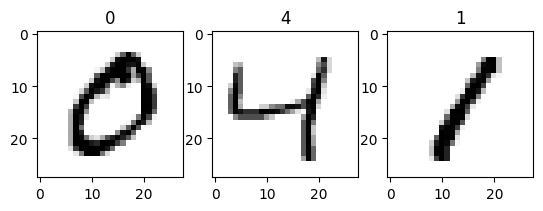

In [29]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(y_train[1])

for n in [1,2,3]:
    plt.subplot(1,3,n)
    plt.imshow(X_train[n], cmap = mpl.cm.binary)
    plt.title(label = y_train[n])

In [30]:
counts = np.bincount(y_train)

print("Nombre d'occurrences de chaque chiffre dans y_train (avec np.bincount):")
for i, count in enumerate(counts):
    print(f"Chiffre {i}: {count} occurrences")

Nombre d'occurrences de chaque chiffre dans y_train (avec np.bincount):
Chiffre 0: 5923 occurrences
Chiffre 1: 6742 occurrences
Chiffre 2: 5958 occurrences
Chiffre 3: 6131 occurrences
Chiffre 4: 5842 occurrences
Chiffre 5: 5421 occurrences
Chiffre 6: 5918 occurrences
Chiffre 7: 6265 occurrences
Chiffre 8: 5851 occurrences
Chiffre 9: 5949 occurrences


In [31]:
counts = np.bincount(y_test)

print("Nombre d'occurrences de chaque chiffre dans y_train (avec np.bincount):")
for i, count in enumerate(counts):
    print(f"Chiffre {i}: {count} occurrences")

Nombre d'occurrences de chaque chiffre dans y_train (avec np.bincount):
Chiffre 0: 980 occurrences
Chiffre 1: 1135 occurrences
Chiffre 2: 1032 occurrences
Chiffre 3: 1010 occurrences
Chiffre 4: 982 occurrences
Chiffre 5: 892 occurrences
Chiffre 6: 958 occurrences
Chiffre 7: 1028 occurrences
Chiffre 8: 974 occurrences
Chiffre 9: 1009 occurrences


# Model selection

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_reshaped_v0 = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped_v0 = X_test.reshape(X_test.shape[0], -1)

X_train_reshaped_v0[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

## Linear SVC

Standard Scaler non necessary because features are already homogeneous.  
Even prevents convergence because it modifies the data structure. 

In [33]:
from sklearn.svm import LinearSVC

X_train_reshaped = X_train_reshaped_v0
X_test_reshaped = X_test_reshaped_v0

model = LinearSVC(random_state=0, tol=1e-5)

print("Cross validation accuracy : ", cross_val_score(model, X_train_reshaped[0:4000,:], y_train[0:4000], cv=3, scoring="accuracy"))

# Confusion matrix
y_train_pred = cross_val_predict(model, X_train_reshaped[0:4000,:], y_train[0:4000], cv=3)
print("Training confusion matrix : ")
print(confusion_matrix(y_train[0:4000], y_train_pred))

# Test
model.fit(X_train_reshaped[0:4000,:], y_train[0:4000])
print("Test accuracy : ", model.score(X_test_reshaped, y_test))

Cross validation accuracy :  [0.81634183 0.83645911 0.83795949]
Training confusion matrix : 
[[351   0   2   4   1   5   4   2  10   0]
 [  0 418   2   0   2   1   1   0  19   1]
 [  4   4 315   9   7   4   5  13  33   3]
 [  4   3  19 311   4  26   2   7  10   6]
 [  2   3   5   5 361   2   6   6  10  30]
 [  6   5   7  23   8 254   9   1  31   6]
 [  3   1   8   0   8  12 360   0  10   3]
 [  4   4   6   6  10   0   0 369   5  29]
 [  9  11  14  12  12  22   6   3 271  13]
 [  5   7   4   4  22   6   0  25  13 311]]
Test accuracy :  0.8124


c:\Users\lea.coquet\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## SGD

SGD handles BIG Datasets so super useful in this case.  
Standard Scaler improves of 2.3% the accuracy.

In [34]:
from sklearn.linear_model import SGDClassifier

X_train_reshaped = scaler.fit_transform(X_train_reshaped_v0)
X_test_reshaped = scaler.transform(X_test_reshaped_v0)

model = SGDClassifier(random_state=0, tol=1e-5)

print("Cross validation accuracy : ", cross_val_score(model, X_train_reshaped[0:4000,:], y_train[0:4000], cv=3, scoring="accuracy"))

# Confusion matrix
y_train_pred = cross_val_predict(model, X_train_reshaped[0:4000,:], y_train[0:4000], cv=3)
print("Training confusion matrix : ")
print(confusion_matrix(y_train[0:4000], y_train_pred))

# Test
model.fit(X_train_reshaped, y_train)
print("Test accuracy : ", model.score(X_test_reshaped, y_test))

Cross validation accuracy :  [0.84857571 0.88297074 0.88297074]
Training confusion matrix : 
[[358   0   5   3   1   7   3   0   2   0]
 [  0 411   4   2   1   2   1   2  21   0]
 [  4   3 334   7  11   4   5   9  15   5]
 [  2   4  15 327   0  23   2   8   7   4]
 [  5   1   4   0 388   1   5   1   6  19]
 [  4   3   2  19  10 271   7   3  25   6]
 [  3   3   6   0   5   9 376   0   3   0]
 [  3   2   5   3   8   0   0 382   1  29]
 [  3  17   7  10   2  11   3   3 309   8]
 [  7   2   2   9  16   3   0  24   4 330]]
Test accuracy :  0.896


c:\Users\lea.coquet\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


## Random Forest

No need of Scaler for this model.  

In [35]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

X_train_reshaped = X_train_reshaped_v0
X_test_reshaped = X_test_reshaped_v0

model = RandomForestClassifier(random_state=42)

print("Cross validation accuracy : ", cross_val_score(model, X_train_reshaped[0:4000,:], y_train[0:4000], cv=3, scoring="accuracy"))

# Confusion matrix
y_train_pred = cross_val_predict(model, X_train_reshaped[0:4000,:], y_train[0:4000], cv=3)
print("Training confusion matrix : ")
print(confusion_matrix(y_train[0:4000], y_train_pred))

# Test
model.fit(X_train_reshaped, y_train)
print("Test accuracy : ", model.score(X_test_reshaped, y_test))



Cross validation accuracy :  [0.90929535 0.92723181 0.92498125]
Training confusion matrix : 
[[368   0   0   1   1   2   2   0   4   1]
 [  0 432   1   0   1   0   3   3   4   0]
 [  5   3 364   3   5   0   4   7   5   1]
 [  1   3   9 343   5   9   2   8   6   6]
 [  1   2   4   1 399   0   9   1   0  13]
 [  4   2   2   9   2 312   8   2   2   7]
 [  3   3   7   0   2   5 383   1   1   0]
 [  3   7   5   0   8   0   0 403   1   6]
 [  1   5   4  10   2  10   4   0 327  10]
 [  5   3   2   5  13   0   1  14   3 351]]
Test accuracy :  0.9705


In [36]:
X_train_reshaped = X_train_reshaped_v0
X_test_reshaped = X_test_reshaped_v0

model = ExtraTreesClassifier(random_state=42)

print("Cross validation accuracy : ", cross_val_score(model, X_train_reshaped[0:4000,:], y_train[0:4000], cv=3, scoring="accuracy"))

# Confusion matrix
y_train_pred = cross_val_predict(model, X_train_reshaped[0:4000,:], y_train[0:4000], cv=3)
print("Training confusion matrix : ")
print(confusion_matrix(y_train[0:4000], y_train_pred))

# Test
model.fit(X_train_reshaped, y_train)
print("Test accuracy : ", model.score(X_test_reshaped, y_test))

Cross validation accuracy :  [0.92503748 0.93623406 0.93023256]
Training confusion matrix : 
[[372   0   0   1   0   0   2   1   3   0]
 [  0 436   1   1   0   0   0   3   3   0]
 [  5   4 363   4   5   0   3   6   6   1]
 [  1   2   5 354   2  10   3   6   5   4]
 [  2   3   0   1 402   0   7   1   0  14]
 [  2   2   2  12   3 314   7   1   4   3]
 [  5   2   4   0   2   3 389   0   0   0]
 [  2   6   4   0  10   0   0 402   0   9]
 [  0   6   3  12   4  10   3   0 328   7]
 [  4   3   2   6   9   1   2   7   1 362]]
Test accuracy :  0.9722


## KNN

Standard scaler amplifies pixels non-inofmatives. -> not useful here  

weihgts = 'distance' improve a bit the accuracy and n_neighbors =3 are the best param.  

Model with best results !

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                'weights': ['uniform', 'distance']}

# GridSearch
grid_search = GridSearchCV( KNeighborsClassifier(), param_grid, cv=2, n_jobs=-1, verbose=2)

grid_search.fit(X_train_reshaped[0:10000,:], y_train[0:10000])

# Best parameters
print(grid_search.best_params_)
print(grid_search.best_score_)


Fitting 2 folds for each of 14 candidates, totalling 28 fits
{'n_neighbors': 3, 'weights': 'distance'}
0.9306


In [38]:
model = KNeighborsClassifier(n_neighbors=3, weights = 'distance') # default is weights = 'uniform'

X_train_reshaped = X_train_reshaped_v0
X_test_reshaped = X_test_reshaped_v0

print("Cross validation accuracy : ", cross_val_score(model, X_train_reshaped[0:4000,:], y_train[0:4000], cv=3, scoring="accuracy"))

# Confusion matrix
y_train_pred = cross_val_predict(model, X_train_reshaped[0:4000,:], y_train[0:4000], cv=3)
print("Training confusion matrix : ")
print(confusion_matrix(y_train[0:4000], y_train_pred))

# Test
model.fit(X_train_reshaped, y_train)
print("Test accuracy : ", model.score(X_test_reshaped, y_test))

Cross validation accuracy :  [0.90929535 0.92648162 0.92423106]
Training confusion matrix : 
[[373   0   0   3   0   1   2   0   0   0]
 [  0 438   1   0   2   1   0   2   0   0]
 [  2  15 347   3   3   0   3  16   8   0]
 [  3   6   3 352   1  11   2   6   6   2]
 [  0  16   1   0 385   0   3   3   0  22]
 [  3   3   1  17   2 309   7   1   1   6]
 [  4   3   1   0   0   3 393   0   0   1]
 [  0   9   2   0   2   2   0 410   0   8]
 [  3  10   3  13   2  14   2   2 316   8]
 [  2   4   3   2  13   2   3  10   1 357]]
Test accuracy :  0.9717


## KMeans

Analyse du KMeans:
La normalisation (/255) n'a pas d'impact (car distance euclidienne).
SatndardScaler (bon pour des features avec echelles differentes) diminue l'accuracy car donne le même poids a tous les pixels et reduit les importances informatives.

- Si on prend k=50 clusters:  
n_train = 4000, accuracy = 0.7939  
n_train = 60 000, accuracy = 0.8218  
  
- Si k=10, accuracy = 0.5846
- Si k=100, accuracy = 0.8805
  
-> Optimum pour k = 110 (Apres plat)


In [39]:
### KMeans

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split 
from sklearn.metrics import silhouette_score, adjusted_rand_score, confusion_matrix
import seaborn as sns

X_train_reshaped = X_train_reshaped_v0/255
X_test_reshaped = X_test_reshaped_v0/255

x_train_small, x_val, y_train_small, y_val = train_test_split(X_train_reshaped, y_train, test_size=0.2, random_state=42, stratify=y_train)


def find_k_for_best_accuracy(x_train_small, x_val, y_train_small, y_val):
    accuracy_by_k = {}
    
    for k in list(range(10, 51, 5)) + list(range(50, 200, 10)):
        model = KMeans(n_clusters = k, random_state = 42)
        clusters_train = model.fit_predict(x_train_small)
    
        cluster_to_label = {}
        for i in range(k):
            mask = (clusters_train == i)
            if mask.sum() > 0:
                cluster_to_label[i] = np.bincount(y_train_small[mask]).argmax()

        clusters_val = model.predict(x_val)
        y_val_pred = np.array([cluster_to_label[c] for c in clusters_val])
        accuracy = (y_val == y_val_pred).sum() / len(y_val)
        accuracy_by_k[k] = accuracy

    return accuracy_by_k


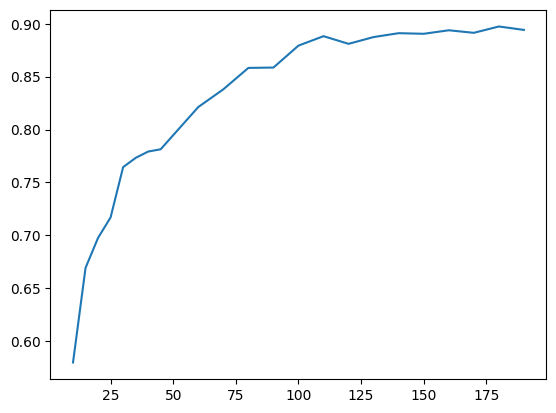

In [40]:
accuracy_b_k = find_k_for_best_accuracy(x_train_small, x_val, y_train_small, y_val)
x = list(accuracy_b_k.keys())
y = list(accuracy_b_k.values())
plt.plot(x,y)

In [41]:
### To test with the best k for accuracy
n_clusters = 110

model = KMeans(n_clusters = n_clusters, random_state = 42)
clusters_train = model.fit_predict(X_train_reshaped)

cluster_to_label = {}
for i in range(n_clusters):
    mask = (clusters_train == i)
    if mask.sum() > 0:
        cluster_to_label[i] = np.bincount(y_train[mask]).argmax()

cluster_to_label

{0: np.int64(4),
 1: np.int64(2),
 2: np.int64(7),
 3: np.int64(8),
 4: np.int64(8),
 5: np.int64(3),
 6: np.int64(6),
 7: np.int64(6),
 8: np.int64(1),
 9: np.int64(9),
 10: np.int64(0),
 11: np.int64(7),
 12: np.int64(0),
 13: np.int64(9),
 14: np.int64(7),
 15: np.int64(1),
 16: np.int64(6),
 17: np.int64(4),
 18: np.int64(9),
 19: np.int64(0),
 20: np.int64(4),
 21: np.int64(2),
 22: np.int64(3),
 23: np.int64(5),
 24: np.int64(2),
 25: np.int64(4),
 26: np.int64(9),
 27: np.int64(8),
 28: np.int64(9),
 29: np.int64(6),
 30: np.int64(2),
 31: np.int64(3),
 32: np.int64(1),
 33: np.int64(3),
 34: np.int64(1),
 35: np.int64(3),
 36: np.int64(7),
 37: np.int64(3),
 38: np.int64(6),
 39: np.int64(7),
 40: np.int64(6),
 41: np.int64(0),
 42: np.int64(0),
 43: np.int64(4),
 44: np.int64(0),
 45: np.int64(7),
 46: np.int64(2),
 47: np.int64(5),
 48: np.int64(7),
 49: np.int64(5),
 50: np.int64(7),
 51: np.int64(2),
 52: np.int64(4),
 53: np.int64(1),
 54: np.int64(3),
 55: np.int64(9),
 5


Précision après mapping: 0.8866


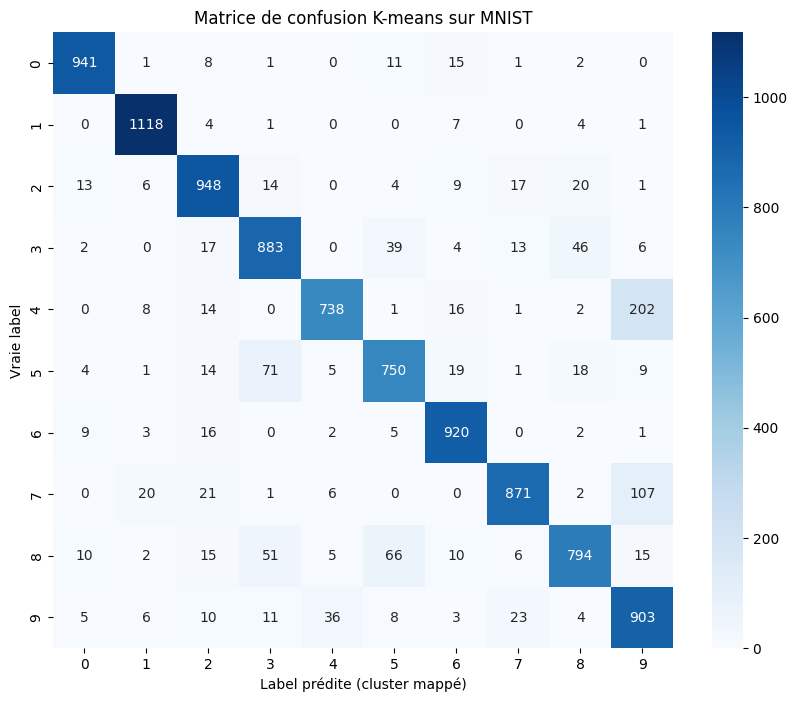

In [42]:
clusters_test = model.predict(X_test_reshaped)

# Mapper les clusters aux labels (avec le mapping appris sur train)
y_test_pred = np.array([cluster_to_label[c] for c in clusters_test])

# Précision
accuracy = (y_test == y_test_pred).sum() / len(y_test)
print(f"\nPrécision après mapping: {accuracy:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion K-means sur MNIST')
plt.ylabel('Vraie label')
plt.xlabel('Label prédite (cluster mappé)')
plt.show()

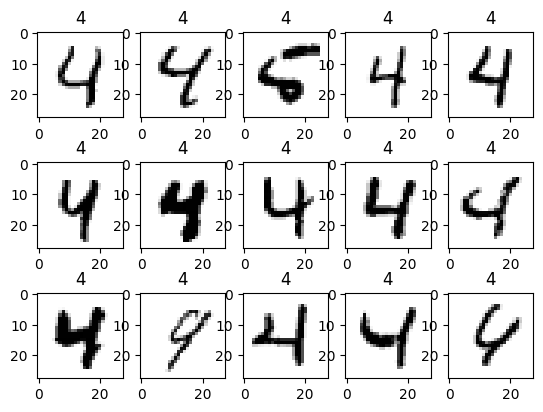

In [49]:
i=1
for n in range(4000):
    if y_test_pred[n] == 4:
        plt.subplot(3,5,i)
        plt.imshow(X_test[n], cmap = mpl.cm.binary)
        plt.title(label = y_test_pred[n])
        i+=1
    if i>15:
        break

## Voting Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train_reshaped = X_train_reshaped_v0/255
X_test_reshaped = X_test_reshaped_v0/255

x_train_small, x_val, y_train_small, y_val = train_test_split(X_train_reshaped, y_train, test_size=0.2, random_state=42, stratify=y_train)


random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
svm_clf = LinearSVC(max_iter=100, tol=20, random_state=42)
mlp_clf = MLPClassifier(random_state=42)

estimators = [random_forest_clf, extra_trees_clf, svm_clf, mlp_clf]
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(x_train_small, y_train_small)

[estimator.score(x_val, y_val) for estimator in estimators]

Training the RandomForestClassifier(random_state=42)
Training the ExtraTreesClassifier(random_state=42)
Training the LinearSVC(max_iter=100, random_state=42, tol=20)
Training the MLPClassifier(random_state=42)


[0.9665, 0.9705833333333334, 0.09875, 0.977]

In [51]:
from sklearn.ensemble import VotingClassifier
named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    ("mlp_clf", mlp_clf),
]
voting_clf = VotingClassifier(named_estimators)
voting_clf.fit(x_train_small, y_train_small)
voting_clf.score(x_val, y_val)

0.9720833333333333

In [52]:
voting_clf.voting = "soft"
voting_clf.score(x_val, y_val)

0.9786666666666667

## Stacking Ensemble

In [53]:
X_val_predictions = np.empty((len(x_val), len(estimators)), dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_val_predictions[:, index] = estimator.predict(x_val)

X_val_predictions

array([[9., 7., 0., 7.],
       [7., 7., 0., 7.],
       [3., 3., 0., 3.],
       ...,
       [8., 8., 0., 8.],
       [6., 6., 0., 6.],
       [7., 7., 0., 7.]], dtype=float32)

In [54]:
# Blender is a random forest
rnd_forest_blender = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)
rnd_forest_blender.fit(X_val_predictions, y_val)
rnd_forest_blender.oob_score_

0.9754166666666667

In [55]:
X_test_predictions = np.empty((len(X_test_reshaped), len(estimators)), dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_test_predictions[:, index] = estimator.predict(X_test_reshaped)
y_pred = rnd_forest_blender.predict(X_test_predictions)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.975

## Training set expansion with Image shifts + Best models (KNN & Extra Trees)

In [56]:
from scipy.ndimage import shift

def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array, [dy, dx], cval=new)

X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images_batch = np.zeros_like(X_train)
    for i in range(X_train.shape[0]):
        shifted_images_batch[i] = shift_digit(X_train[i], dx=dx, dy=dy)
    
    X_train_expanded.append(shifted_images_batch)
    y_train_expanded.append(y_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

((300000, 28, 28), (300000,))

Text(0.5, 1.0, '0')

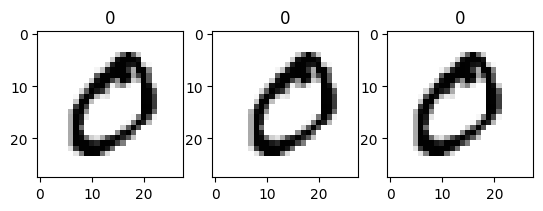

In [57]:
plt.subplot(1,3,1)
plt.imshow(X_train_expanded[1], cmap = mpl.cm.binary)
plt.title(label = y_train_expanded[1])

plt.subplot(1,3,2)
plt.imshow(X_train_expanded[60001], cmap = mpl.cm.binary)
plt.title(label = y_train_expanded[60001])

plt.subplot(1,3,3)
plt.imshow(X_train_expanded[120001], cmap = mpl.cm.binary)
plt.title(label = y_train_expanded[120001])

In [58]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3, weights = 'distance') # default is weights = 'uniform'

X_train_extended_reshaped = X_train_expanded.reshape(X_train_expanded.shape[0], -1)

# Test
model.fit(X_train_extended_reshaped, y_train_expanded)
print("Test accuracy : ", model.score(X_test_reshaped_v0, y_test))

Test accuracy :  0.9763


In [59]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(random_state = 42)

X_train_extended_reshaped = X_train_expanded.reshape(X_train_expanded.shape[0], -1)

# Test
model.fit(X_train_extended_reshaped, y_train_expanded)
print("Test accuracy : ", model.score(X_test_reshaped_v0, y_test))

Test accuracy :  0.9809
